In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
df = pd.read_csv("C:/Users/Asus/Desktop/Credora_Internship/Task_02_EDA_Titanic/Dataset/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data Cleaning

In [5]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17612\3881770384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [7]:
# Fill Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17612\1405579858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [8]:
# Drop Cabin
df.drop("Cabin", axis=1, inplace=True)

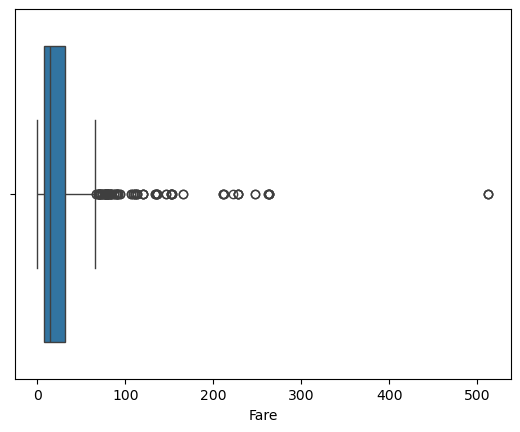

In [9]:
# Boxplot for Fare to check outliers
sns.boxplot(x=df['Fare'])
plt.show()

In [10]:
# Cap Fare at 99th percentile
fare_99 = df['Fare'].quantile(0.99)
df['Fare'] = df['Fare'].apply(lambda x: fare_99 if x > fare_99 else x)

In [11]:
# Convert Sex and Embarked to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# EXPLORATORY DATA ANALYSIS (EDA)

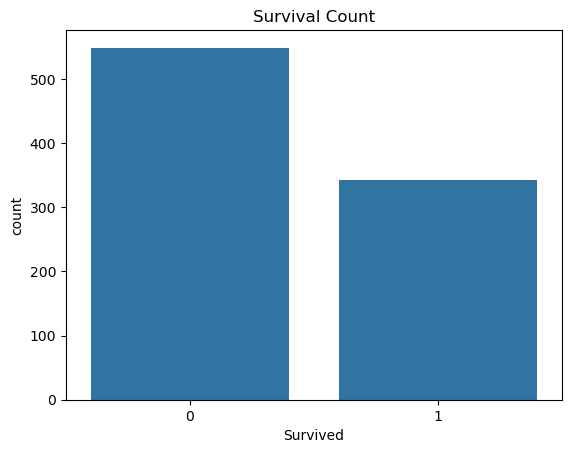

In [12]:
#Survival Rate
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

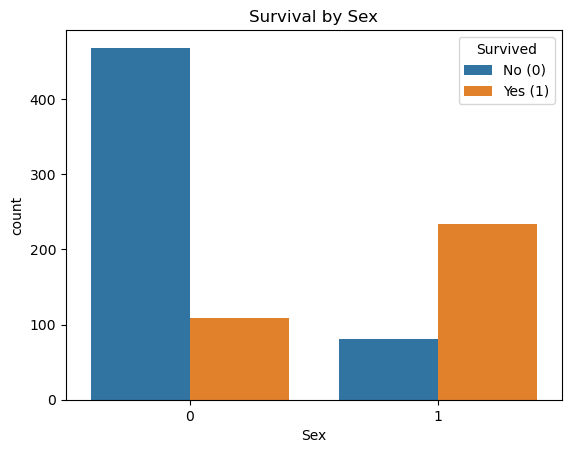

In [13]:
# Survival by Sex
sns.countplot(x="Sex",  data=df, hue="Survived")
plt.title("Survival by Sex")
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.show()

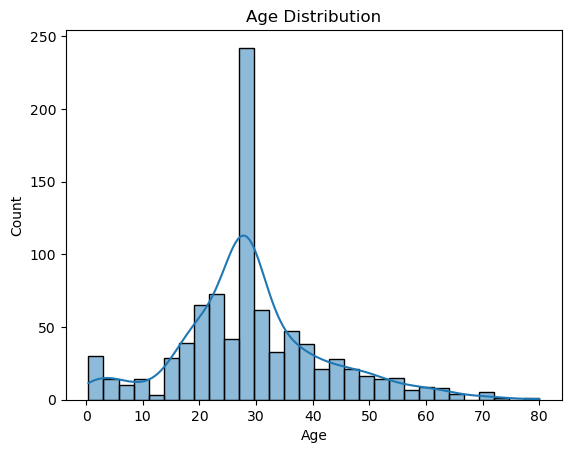

In [14]:
# Age Distribution
sns.histplot(x='Age', data=df, bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

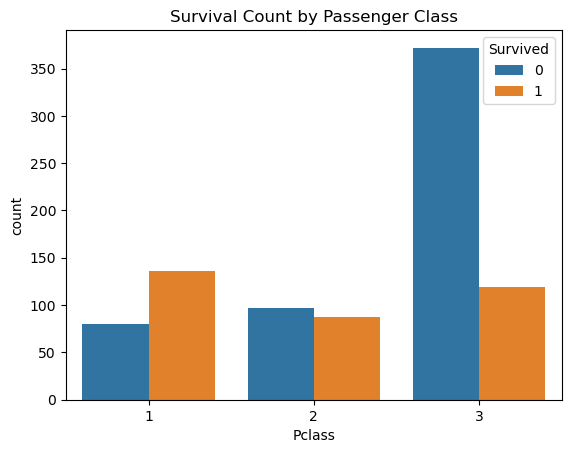

In [15]:
# Survival by Pclass
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()

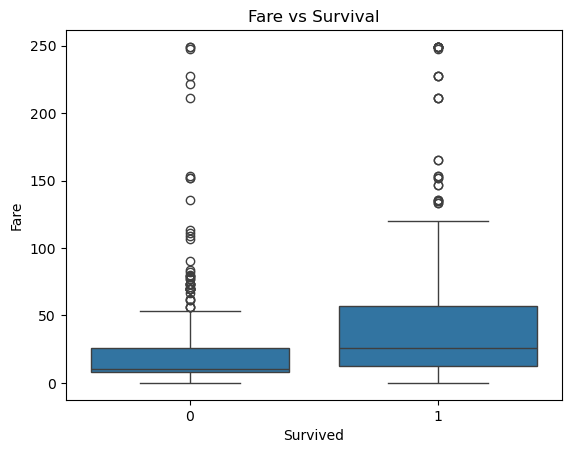

In [16]:
# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()